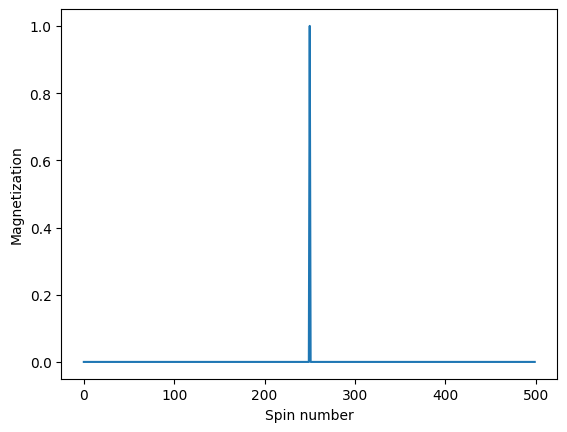

In [26]:
import numpy as np
from scipy.fft import fftshift, fft2
import matplotlib.pyplot as plt

N_spins = 500  # Number of spins in the phantom
# # Create the phantom
# The phantom is rect pulse of size 100
# phantom = np.zeros(N_spins, dtype=np.complex128)  # All spins start at zero
# pulse_end = 200 + 100
# phantom[200:pulse_end] = 1  # Set the pulse to the desired amplitude

phantom = np.zeros(N_spins, dtype=np.complex128)  # All spins start at zero
phantom[250] = 1  # Set the delta function to the desired amplitude

# x = np.arange(N_spins)  # Generate an array of indices
# phantom = 2 * np.exp(1j * (2 * np.pi * 5 * x / N_spins  + 0))  # Generate a complex sine wave with the desired frequency, amplitude, and phase

# Plot the initial state of the phantom
plt.figure()
plt.plot(phantom.real)
plt.xlabel('Spin number')
plt.ylabel('Magnetization')
plt.show()

gamma = 42.58e6  # Gyromagnetic ratio for hydrogen in Hz/T
Gx = 0.029356505401596993  # Gradient strength in T/m
B0 = 1.0  # B0 field in T

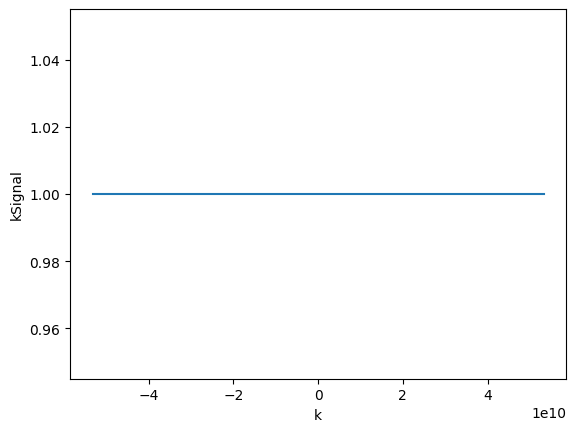

In [27]:
# RF pulse
angle = np.pi / 2  # 90 degree flip
phantom *= np.exp(1j * angle)  # Rotate each spin by 90 degrees

tau = 2e-3
time = np.linspace(-tau/2,tau/2,N_spins)
Gx_values = time*gamma*Gx  # Gx field, non-uniform

kx = gamma * Gx_values  # k-space trajectory

k_signal = np.zeros_like(kx, dtype=np.complex128)
FOV = .2  # meters

x_values = np.linspace(-FOV / 2, FOV / 2, N_spins)  # Assuming spins are evenly spaced


for i, k in enumerate(kx):
    k_signal[i] = np.sum(phantom * np.exp(-1j  * k * x_values))  # k-space signal is sum of all spins

# Take an fftshift of the k-space signal
k_signal_shifted = np.fft.fftshift(k_signal)


# Plot the k-space signal
plt.figure()
plt.plot(kx, np.abs(k_signal_shifted))
plt.xlabel('k')
plt.ylabel('kSignal')
plt.show()

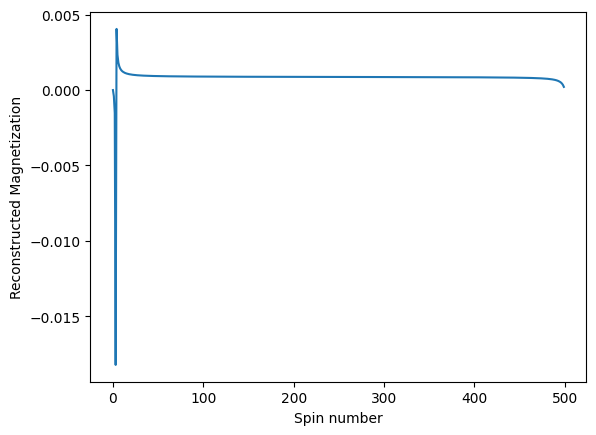

In [28]:
# Reconstruct the image with an inverse Fourier transform
reconstructed_phantom = np.fft.ifft(np.fft.ifftshift(k_signal_shifted))

# Plot the reconstructed phantom
plt.figure()
plt.plot(reconstructed_phantom.real)
plt.xlabel('Spin number')
plt.ylabel('Reconstructed Magnetization')
plt.show()

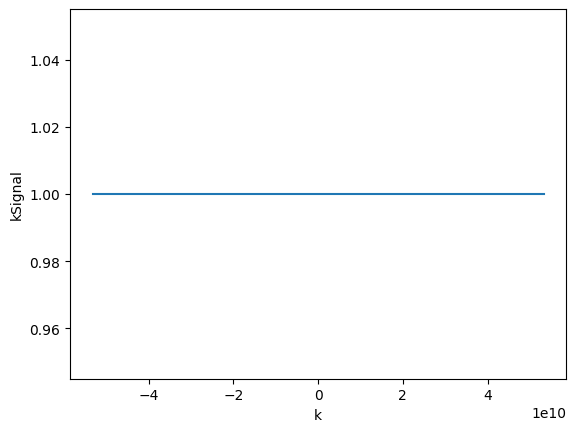

In [29]:
# Encoding matrix
E = np.zeros((N_spins, N_spins), dtype=np.complex128)
for i in range(N_spins):
    for j in range(N_spins):
        E[i, j] = np.exp(-1j * kx[i] * x_values[j]) 



# Now, let's multiply the encoding matrix E by the phantom to get the k-space signal
s = np.dot(E, phantom)

# Plot the k-space signal
plt.figure()
plt.plot(kx, np.abs(s))
plt.xlabel('k')
plt.ylabel('kSignal')
plt.show()


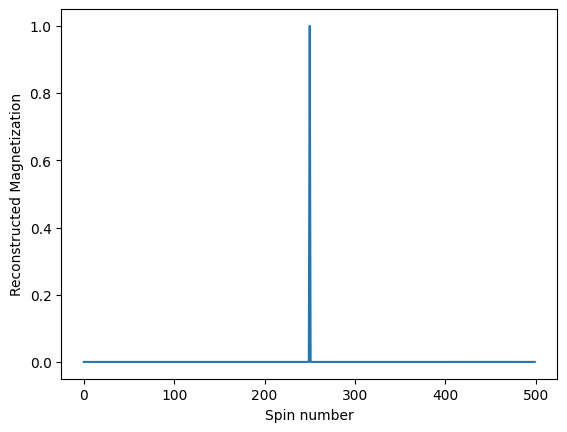

In [30]:
E_inv = np.linalg.inv(E)

image = np.dot(E_inv, s)   # Reconstruct the image

# Plot the reconstructed image
plt.figure()
plt.plot(np.abs(image))
plt.xlabel('Spin number')
plt.ylabel('Reconstructed Magnetization')
plt.show()

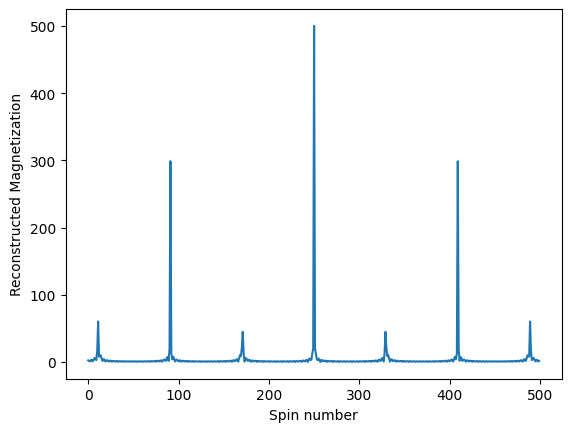

In [31]:
E_inv_1 = np.zeros((N_spins, N_spins), dtype=np.complex128)

for i in range(N_spins):
    for j in range(N_spins):
        E_inv_1[i, j] = np.exp(1j * kx[i] * x_values[j]) 


image_1 = np.dot(E_inv_1, s)   # Reconstruct the image

# Plot the reconstructed image
plt.figure()
plt.plot(np.abs(image_1))
plt.xlabel('Spin number')
plt.ylabel('Reconstructed Magnetization')
plt.show()